In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
col_dirs = os.listdir('Collisions/')
print(col_dirs)

list_of_df = []
for col_run in col_dirs:
    list_of_df.append(pd.read_csv('Collisions/'+col_run+'/'+col_run+'_final.csv'))
    
collision_data = pd.concat(list_of_df)


['325022', '321887', '322088', '321917', '322332', '325117', '323474', '324764', '322407', '324245', '322633', '324209', '321908', '324747', '323700', '324729', '325170', '321961', '322319', '321818', '323524', '325172', '322179', '322605', '325000', '322381', '323693', '325057', '324202', '323857', '323725', '321975', '322348', '321774', '321834', '323775', '321988', '321777', '321780', '324998', '322324', '321879', '321755', '324980', '323997', '323526', '323493', '324772', '322022', '324237', '324835', '324318', '322204', '322079', '325101', '322355', '323696', '324997', '323473', '324878', '321833', '321730', '324021', '323488', '322106', '324769', '321732', '323778', '324022', '321990', '323727', '324791', '324897', '321973', '323790', '322356', '323841', '324841', '321933', '321712', '323487', '321813', '324315', '322625', '323983', '325099', '324293', '324970', '322068', '325001', '321760', '322617', '321909', '321781', '321831', '322431', '323755', '324205', '325159', '321758',

In [4]:
df = collision_data
df['occupancy/LS'] = df['occupancy'] / df['lumisections']
df = df.reset_index(drop=True)
df.describe()

,run,wheel,sector,station,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,lumisections,avg_efficiency,fid_eff_ch_level,occupancy/LS
count,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000
mean,323224.863636,0.000000,6.375000,2.500000,1.768594,26026.126878,0.013440,0.923000,1.773684,655.075758,74.017543,87.000385,55.837064
std,1218.646049,1.414225,3.428614,1.118043,0.589515,28945.283787,0.062427,0.271374,0.591601,525.279940,26.915828,27.267780,156.852237
min,321475.000000,-2.000000,1.000000,1.000000,0.000000,0.000000,-1.150170,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000
25%,321989.500000,-1.000000,3.750000,1.750000,1.733998,6507.000000,0.003631,1.000980,1.736638,253.500000,65.934067,94.181784,19.009580
50%,323480.500000,0.000000,6.000000,2.500000,1.896530,16243.000000,0.005824,1.002260,1.900730,496.500000,85.313299,96.853283,32.499737
75%,324239.000000,1.000000,9.000000,3.250000,2.036370,34260.000000,0.008599,1.004020,2.044415,874.500000,91.186260,97.754226,59.934915
max,325172.000000,2.000000,12.000000,4.000000,41.000000,219511.000000,3.358350,1.025860,41.000000,2346.000000,100.000000,100.000000,3308.052632


# All Runs together

### 1D histograms

array([[<AxesSubplot:title={'center':'avg_cluster_size'}>,
        <AxesSubplot:title={'center':'occupancy'}>,
        <AxesSubplot:title={'center':'avg_bx_dist'}>],
       [<AxesSubplot:title={'center':'avg_no_of_clusters'}>,
        <AxesSubplot:title={'center':'avg_multiplicity'}>,
        <AxesSubplot:title={'center':'lumisections'}>],
       [<AxesSubplot:title={'center':'avg_efficiency'}>,
        <AxesSubplot:title={'center':'fid_eff_ch_level'}>,
        <AxesSubplot:title={'center':'occupancy/LS'}>]], dtype=object)

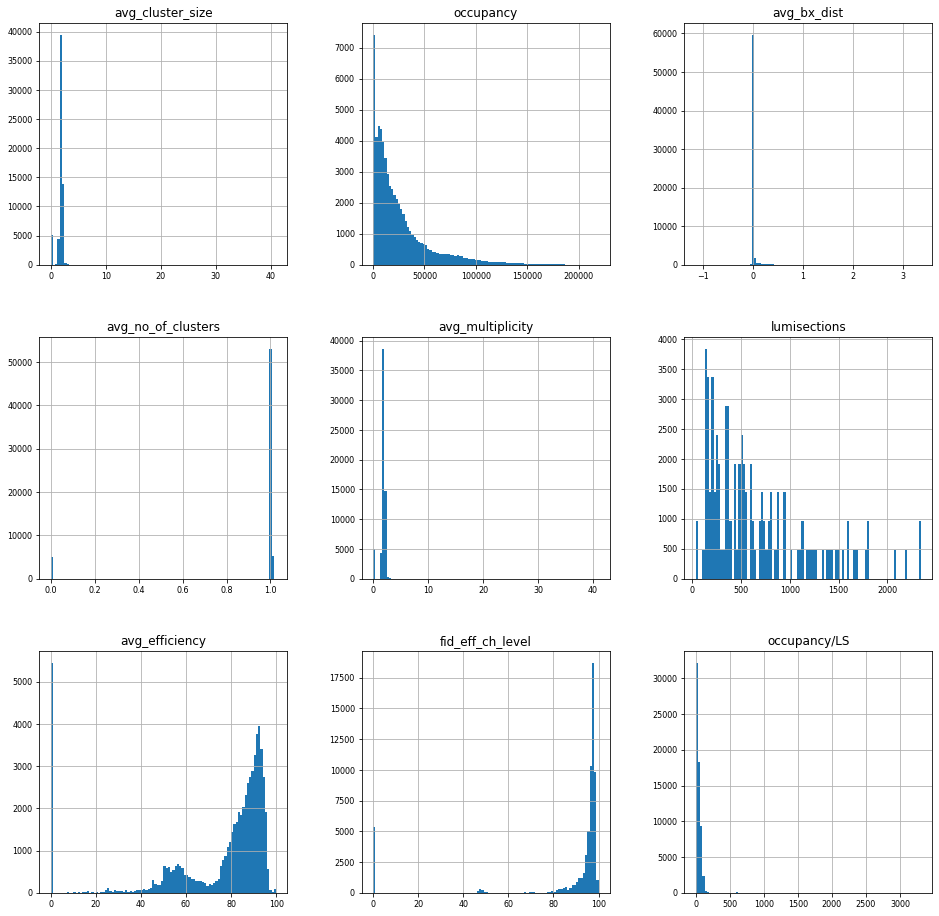

In [5]:
df_hist = df
df_hist = df_hist.drop(['run', 'chamber', 'wheel', 'sector', 'station', 'type'], axis=1)
df_hist.hist(figsize=(16, 16), bins=100, xlabelsize=8, ylabelsize=8)

In [6]:
df[df['avg_multiplicity'] >= 4]

,run,chamber,wheel,sector,station,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,lumisections,type,avg_efficiency,fid_eff_ch_level,occupancy/LS
2069,322332,W-1_RB2out_S07,-1,7,2,7.0,7,1.0,1.0,7.0,1079,Col,0.0,0.0,0.006487
14069,323857,W-1_RB2out_S07,-1,7,2,6.0,6,0.0,1.0,6.0,369,Col,0.0,0.0,0.016260
28469,324878,W-1_RB2out_S07,-1,7,2,41.0,41,1.0,1.0,41.0,1800,Col,0.0,0.0,0.022778
37109,324841,W-1_RB2out_S07,-1,7,2,26.0,26,1.0,1.0,26.0,1343,Col,0.0,0.0,0.019360
45749,322431,W-1_RB2out_S07,-1,7,2,5.0,5,2.0,1.0,5.0,1272,Col,0.0,0.0,0.003931
50921,324846,W-2_RB4-_S05,-2,5,4,4.0,4,3.0,1.0,4.0,526,Col,0.0,0.0,0.007605
56263,324765,W-1_RB4-_S01,-1,1,4,6.0,6,-1.0,1.0,6.0,478,Col,0.0,0.0,0.012552


In [7]:
#droping the row with avg_multiplicity 41 (outlier)
i = df[df['avg_multiplicity'] >= 4].index
df = df.drop(i)
df.shape[0]

63353

In [8]:
print(df[ (df['occupancy'] == 0) & (df['fid_eff_ch_level'] == 0)].shape[0])
print(df[ (df['occupancy'] != 0) & (df['fid_eff_ch_level'] == 0)].shape[0])

5040
275


In [9]:
# droping the rows with fid eff = 0
i = df[df['fid_eff_ch_level'] == 0].index
df = df.drop(i)
df.shape[0]

58038

array([[<AxesSubplot:title={'center':'avg_cluster_size'}>,
        <AxesSubplot:title={'center':'occupancy'}>,
        <AxesSubplot:title={'center':'avg_bx_dist'}>],
       [<AxesSubplot:title={'center':'avg_no_of_clusters'}>,
        <AxesSubplot:title={'center':'avg_multiplicity'}>,
        <AxesSubplot:title={'center':'lumisections'}>],
       [<AxesSubplot:title={'center':'avg_efficiency'}>,
        <AxesSubplot:title={'center':'fid_eff_ch_level'}>,
        <AxesSubplot:title={'center':'occupancy/LS'}>]], dtype=object)

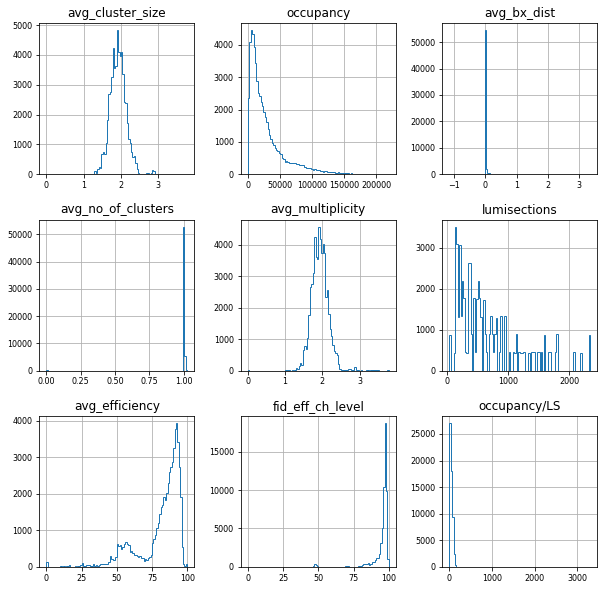

In [10]:
# from the lumisction histogram it can be concluded that number 
# of zero fid-eff chambers are almost the same for each run.
df_hist = df
df_hist = df_hist.drop(['run', 'chamber', 'wheel', 'sector', 'station', 'type'], axis=1)
df_hist.hist(figsize=(10, 10), bins=100, xlabelsize=8, ylabelsize=8, histtype = 'step')
# plt.savefig('/Users/erfan/Desktop/hist_all.pdf')

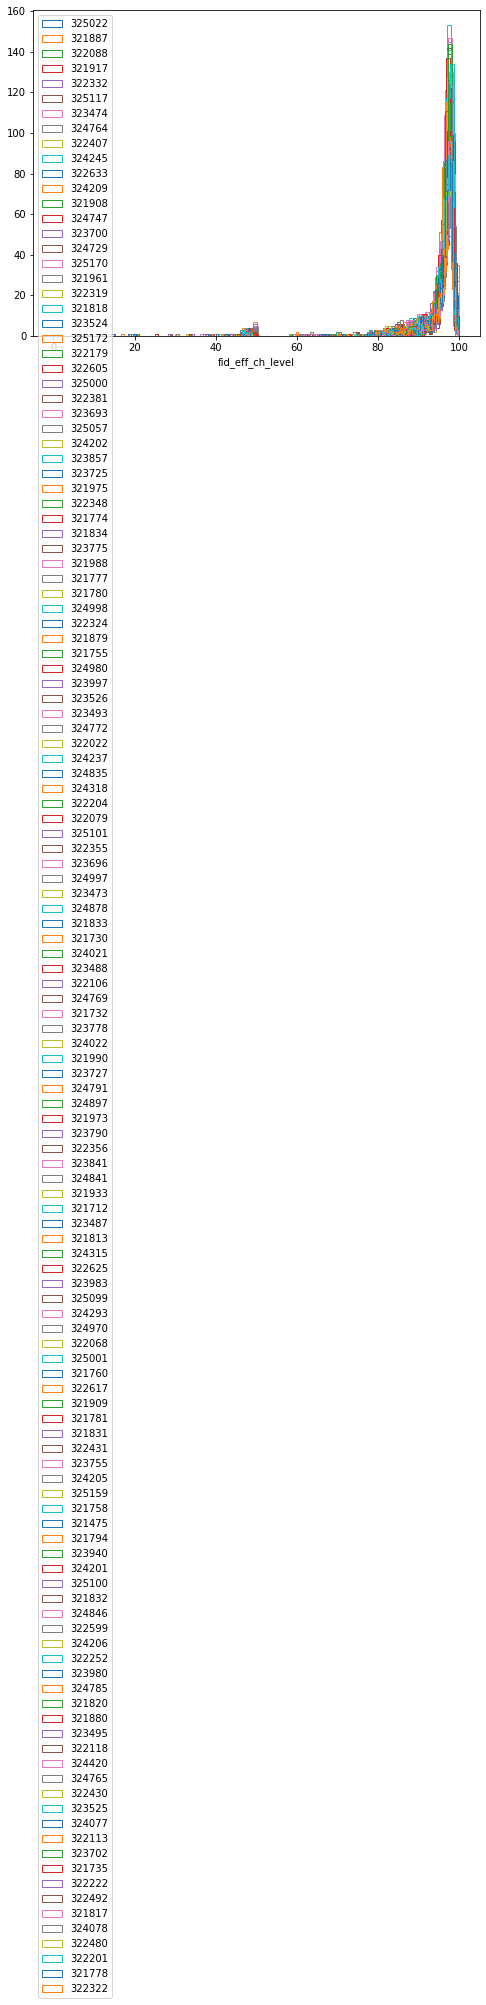

In [11]:
# checking the origin of picks in 'fid_eff_ch_level' and find out if they are 
# related to separate Runs.
# avg_no_of_clusters  'fid_eff_ch_level' 'avg_efficiency'
name = 'fid_eff_ch_level'
df_pick = df[[name, 'run']]
plt.figure(figsize=(8, 6))
for col_run in col_dirs:
    n = int(col_run)
    df_pick_s = df_pick[df_pick['run'] == n]
    plt.hist(df_pick_s[name], bins = 100, alpha=1, label= col_run, histtype = 'step')

plt.xlabel(name)
plt.legend(loc='upper left')
# plt.savefig('/Users/erfan/Desktop/fid_eff_runs.pdf')
plt.show()

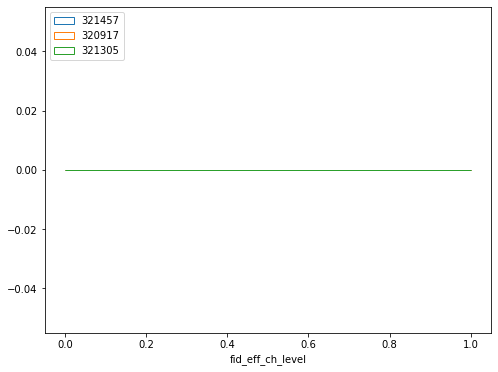

In [12]:
# it seems that for run numbers ['321457' ,'320917', '321305' ] 
# the fid_eff distribution is different. 
name = 'fid_eff_ch_level'
df_pick = df[[name, 'run']]
col_dirs2 = ['321457' ,'320917', '321305' ]
plt.figure(figsize=(8, 6))
for col_run in col_dirs2:
    n = int(col_run)
    df_pick_s = df_pick[df_pick['run'] == n]
    plt.hist(df_pick_s[name], bins = 100, alpha=1, label= col_run, histtype = 'step')

plt.xlabel(name)
plt.legend(loc='upper left')
plt.show()

### Correlations

In [13]:
df_hist.describe()

,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,lumisections,avg_efficiency,fid_eff_ch_level,occupancy/LS
count,58038.000000,58038.000000,58038.000000,58038.000000,58038.000000,58038.000000,58038.000000,58038.000000,58038.000000
mean,1.919975,28281.370292,0.014396,1.002764,1.925504,655.354009,80.799532,94.978194,60.674721
std,0.215862,29123.791326,0.061186,0.004546,0.218172,525.626922,15.587210,7.347304,162.694659
min,0.000000,0.000000,-1.150170,0.000000,0.000000,32.000000,0.000000,0.034294,0.000000
25%,1.778097,8393.250000,0.004194,1.001150,1.781870,254.000000,77.447850,95.306782,21.971755
50%,1.915800,18412.500000,0.006163,1.002720,1.920905,495.000000,86.564573,97.035082,35.479678
75%,2.047802,36665.250000,0.008935,1.004120,2.056065,876.000000,91.541348,97.819621,62.624942
max,3.782520,219511.000000,3.358350,1.025860,3.782520,2346.000000,100.000000,100.000000,3308.052632


In [14]:
# correlation of different variables
# avg_multiplicity and avg_cluster_size are the highest correlated ones
# fid_eff_ch_level is mostly correlated with avg_cluster_size
df_hist = df_hist.drop(['lumisections'], axis=1)
df_hist.corr()

,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,avg_efficiency,fid_eff_ch_level,occupancy/LS
avg_cluster_size,1.000000,0.333330,-0.001879,0.225044,0.999894,0.019470,0.175424,0.127843
occupancy,0.333330,1.000000,-0.017640,0.176618,0.337799,0.039509,0.075786,0.186829
avg_bx_dist,-0.001879,-0.017640,1.000000,0.001356,-0.001831,-0.030851,-0.037166,-0.003453
avg_no_of_clusters,0.225044,0.176618,0.001356,1.000000,0.229871,-0.013805,0.060799,0.068327
avg_multiplicity,0.999894,0.337799,-0.001831,0.229871,1.000000,0.017938,0.174573,0.129581
avg_efficiency,0.019470,0.039509,-0.030851,-0.013805,0.017938,1.000000,0.421254,0.008042
fid_eff_ch_level,0.175424,0.075786,-0.037166,0.060799,0.174573,0.421254,1.000000,0.024189
occupancy/LS,0.127843,0.186829,-0.003453,0.068327,0.129581,0.008042,0.024189,1.000000


<AxesSubplot:>

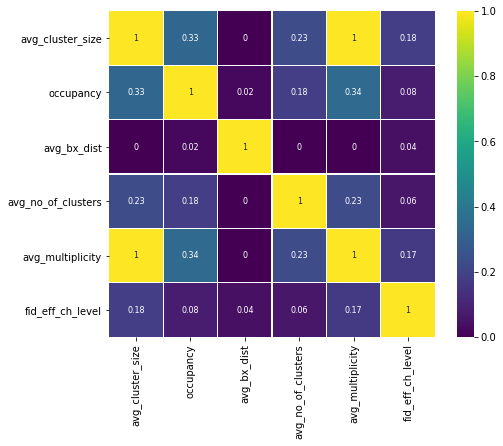

In [15]:
df_cor = df_hist.drop([ 'occupancy/LS', 'avg_efficiency'], axis=1)
plt.figure(figsize=(8, 6))
cor = abs(df_cor.corr())
sns.heatmap(cor.round(decimals=2), 
            cmap='viridis', vmax=1.0, vmin=0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
# plt.savefig('/Users/erfan/Desktop/correlation.pdf')

### 2D histograms

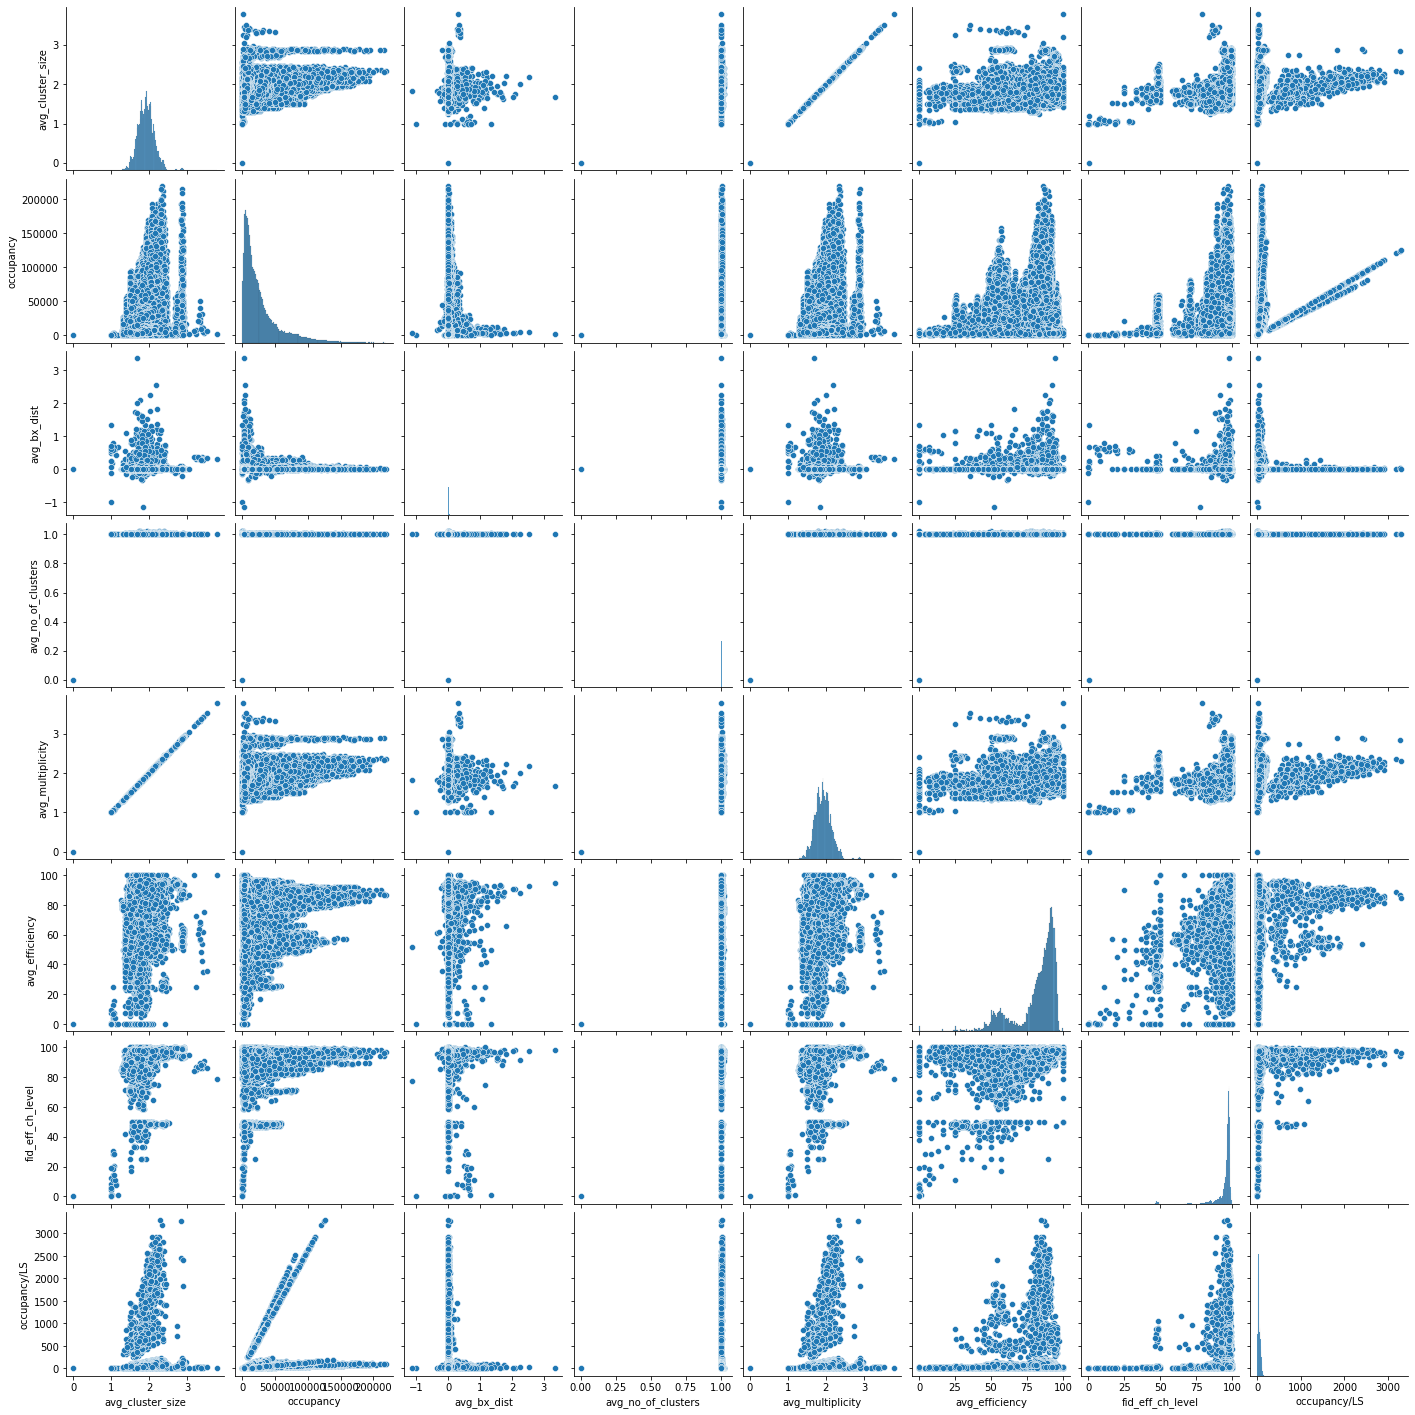

In [16]:
sns.pairplot(df_hist)

#### spliting by fid_eff (not completed)

In [17]:
# checking the 2d histograms after spliting the data into 
# two parts: A-fid_eff > 80 and B-fid_eff <80
print(len(df_hist))
print(df_hist[df_hist['fid_eff_ch_level'] >= 80].shape[0])

58038
56574


In [18]:
c = []
df_hist = df_hist.reset_index(drop=True)
for i in range(len(df_hist)):
    if df_hist['fid_eff_ch_level'][i] >= 80:
        c.append('high')
    else:
        c.append('low')
df_hist = df_hist.assign( eff_cl = c)
df_hist.head()

,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,avg_efficiency,fid_eff_ch_level,occupancy/LS,eff_cl
0,1.92231,81335,0.005341,1.00396,1.92993,52.692854,96.813076,51.218514,high
1,1.85157,71452,0.007152,1.00330,1.85768,57.521912,97.891937,44.994962,high
2,2.00157,85179,0.007520,1.00368,2.00894,79.878120,98.281658,53.639169,high
3,1.85402,73117,0.011106,1.00323,1.86001,82.926298,98.574773,46.043451,high
4,1.86561,34053,0.003506,1.00115,1.86776,91.554276,98.225697,21.443955,high


In [19]:
# orange markers are data with fid_eff_ch_level < 80
# blue markers are data with fid_eff_ch_level >= 80
# sns.pairplot(df_hist, hue='eff_cl',  plot_kws={"s": 3})

#### spliting by run number (not completed)

In [20]:
# checking how the 2d histograms differ if we split the data in to two parts by 
# Run numbers which has different fid_eff distribution as shown in 1d histogram section:
# A: [321457 ,320917, 321305, 321305] and B: else
df_hist = df
df_hist = df_hist.drop(['lumisections', 'chamber', 'wheel', 'sector', 'station', 'type'], axis=1)
run_list = np.array([321457 ,320917, 321305, 321305])
label = []
df_hist = df_hist.reset_index(drop=True)
for i in range(len(df_hist)):
    if df_hist['run'][i] in run_list:
        label.append('A')
    else:
        label.append('B')
df_hist = df_hist.assign( run_label = label)
df_hist = df_hist.drop(['run'], axis=1)
df_hist.head()

,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,avg_efficiency,fid_eff_ch_level,occupancy/LS,run_label
0,1.92231,81335,0.005341,1.00396,1.92993,52.692854,96.813076,51.218514,B
1,1.85157,71452,0.007152,1.00330,1.85768,57.521912,97.891937,44.994962,B
2,2.00157,85179,0.007520,1.00368,2.00894,79.878120,98.281658,53.639169,B
3,1.85402,73117,0.011106,1.00323,1.86001,82.926298,98.574773,46.043451,B
4,1.86561,34053,0.003506,1.00115,1.86776,91.554276,98.225697,21.443955,B


### colorbar 2D histograms

FileNotFoundError: [Errno 2] No such file or directory: '/Users/erfan/Desktop/CBhist4.pdf'

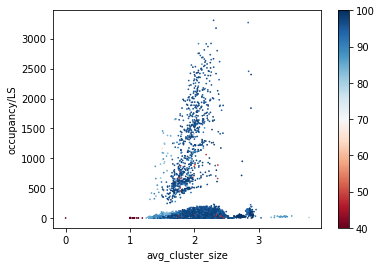

In [21]:
# from the histogram we can conclude that occupancy/LS and avg_cluster_size 
# seem to be good features to divide the data with efficiency 70-90 and 90-100
# and data points with low efficiency are randomly distributed 
cm = plt.cm.get_cmap('RdBu')
name2 = 'occupancy/LS'
name1 = 'avg_cluster_size'
x = np.array(df[name1])
y = np.array(df[name2])
z = np.array(df['fid_eff_ch_level'])
sc = plt.scatter(x, y, c=z, vmin=40, vmax=100, s=0.5, cmap=cm)
plt.colorbar(sc)
plt.xlabel(name1)
plt.ylabel(name2)
plt.savefig('/Users/erfan/Desktop/CBhist4.pdf')

Text(0, 0.5, 'avg_no_of_clusters')

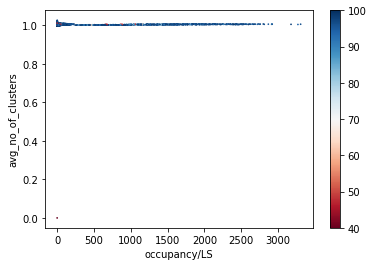

In [22]:
# avg_no_of_clusters and occupancy/LS seem to be good features to find out 
# data points with low efficiency 50< (red points)
cm = plt.cm.get_cmap('RdBu')
# cm = plt.cm.get_cmap('viridis')
name2 = 'avg_no_of_clusters'
name1 = 'occupancy/LS'
x = np.array(df[name1])
y = np.array(df[name2])
z = np.array(df['fid_eff_ch_level'])
sc = plt.scatter(x, y, c=z, vmin=40, vmax=100, s=0.5, cmap=cm)
plt.colorbar(sc)
plt.xlabel(name1)
plt.ylabel(name2)

## spatial features of Data

In [23]:
df = collision_data
df.head()

,run,chamber,wheel,sector,station,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,lumisections,type,avg_efficiency,fid_eff_ch_level,occupancy/LS
0,325022,W-2_RB1in_S01,-2,1,1,1.92231,81335,0.005341,1.00396,1.92993,1588,Col,52.692854,96.813076,51.218514
1,325022,W-2_RB1out_S01,-2,1,1,1.85157,71452,0.007152,1.00330,1.85768,1588,Col,57.521912,97.891937,44.994962
2,325022,W-2_RB2in_S01,-2,1,2,2.00157,85179,0.007520,1.00368,2.00894,1588,Col,79.878120,98.281658,53.639169
3,325022,W-2_RB2out_S01,-2,1,2,1.85402,73117,0.011106,1.00323,1.86001,1588,Col,82.926298,98.574773,46.043451
4,325022,W-2_RB3+_S01,-2,1,3,1.86561,34053,0.003506,1.00115,1.86776,1588,Col,91.554276,98.225697,21.443955
